<a href="https://colab.research.google.com/github/sanaaria/Ann/blob/main/Copy_of_Ann2_Hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

اتصال به گوگل درایو

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


صدا کردن فایل ها تست وترین و پرد

In [2]:
train_data="/content/drive/MyDrive/kaggle2/seg_train/seg_train"

In [3]:
test_data="/content/drive/MyDrive/kaggle2/seg_test/seg_test"

In [4]:
pred_data="/content/drive/MyDrive/kaggle2/seg_pred"

In [5]:
import torch
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [6]:
import os
import torch
import tarfile
import torchvision
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader

اتصال به دیوایس

In [7]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

ترنسفرم کردن و به تنسور دادن

In [8]:
transform_train= transforms.Compose([transforms.Resize((150, 150))
                                      ,transforms.RandomHorizontalFlip()
                                      ,transforms.RandomRotation(30)
                                      ,transforms.ToTensor()
                                      ,transforms.Normalize((0.425, 0.415, 0.405), (0.205, 0.205, 0.205))])
    
])

# #Augmentation is not done for test/validation data.
# transform_test = transforms.Compose([
    
#     transforms.Resize((150,150)), #becasue vgg takes 150*150
#     transforms.ToTensor(),
#     transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    
# ])

In [9]:
train_ds = ImageFolder(train_data, transform=transform_train)
test_ds = ImageFolder(test_data, transform=transform_train)
pred_ds = ImageFolder(pred_data, transform=transform_train)

In [10]:
print(train_ds.classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [11]:
import os


In [12]:
sea_files = os.listdir(train_data+ "/sea")
print(len(sea_files))

2274


In [13]:
classes = os.listdir(test_data )
print(classes)

['sea', 'forest', 'street', 'mountain', 'glacier', 'buildings']


In [14]:
sea_files = os.listdir(test_data + "/sea")
print(len(sea_files))

510


In [15]:
classes = os.listdir(pred_data )
print(classes)

['seg_pred']


In [16]:
len(train_ds),len(test_ds),len(pred_ds)

(14034, 3000, 6165)

In [17]:
image,label  = train_ds[0]
print(image.shape, label)

torch.Size([3, 150, 150]) 0


In [18]:
image

tensor([[[ 0.9373,  0.9373,  0.9451,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9294,  0.9373,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9294,  0.9294,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         ...,
         [-0.6314, -0.5137, -0.6157,  ..., -0.6000, -0.6471, -0.2627],
         [-0.3961, -0.6314, -0.6627,  ..., -0.8275, -0.5686, -0.6941],
         [-0.5373, -0.5686, -0.5294,  ..., -0.7569, -0.6000, -0.5059]],

        [[ 0.9373,  0.9373,  0.9451,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9294,  0.9373,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         [ 0.9294,  0.9294,  0.9373,  ...,  0.9451,  0.9373,  0.9373],
         ...,
         [-0.6392, -0.5216, -0.6235,  ..., -0.6392, -0.6863, -0.3020],
         [-0.4039, -0.6392, -0.6706,  ..., -0.8667, -0.6078, -0.7333],
         [-0.5451, -0.5765, -0.5373,  ..., -0.7961, -0.6392, -0.5451]],

        [[ 0.9216,  0.9216,  0.9294,  ...,  0.9451,  0.9216,  0.9216],
         [ 0.9137,  0.9216,  0.9216,  ...,  0

In [19]:
image.numpy()

array([[[ 0.9372549 ,  0.9372549 ,  0.94509804, ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        [ 0.92941177,  0.9372549 ,  0.9372549 , ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        [ 0.92941177,  0.92941177,  0.9372549 , ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        ...,
        [-0.6313726 , -0.5137255 , -0.6156863 , ..., -0.6       ,
         -0.64705884, -0.26274508],
        [-0.3960784 , -0.6313726 , -0.6627451 , ..., -0.827451  ,
         -0.5686275 , -0.69411767],
        [-0.5372549 , -0.5686275 , -0.5294118 , ..., -0.75686276,
         -0.6       , -0.5058824 ]],

       [[ 0.9372549 ,  0.9372549 ,  0.94509804, ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        [ 0.92941177,  0.9372549 ,  0.9372549 , ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        [ 0.92941177,  0.92941177,  0.9372549 , ...,  0.94509804,
          0.9372549 ,  0.9372549 ],
        ...,
        [-0.6392157 , -0.52156866, -0.62352943, ..., -

ساخت دیتا لودری کهداده هارا بچ بچ کند :)

In [20]:
batch_size=64
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size, shuffle=True)
pred_dl = DataLoader(pred_ds, batch_size,  shuffle=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [21]:
batch_size=64
train_dl2 = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)

یه بچ رو تصویر میکنیم

images.shape: torch.Size([64, 3, 150, 150])


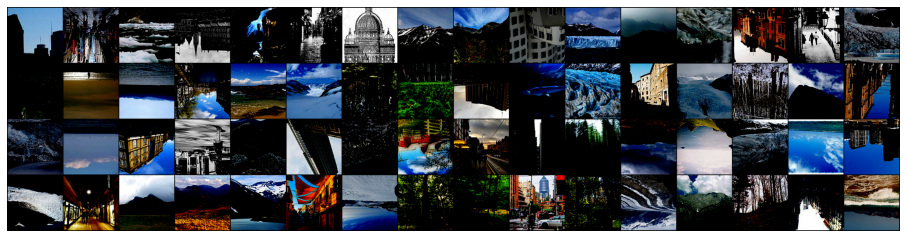

In [22]:
for images, _ in train_dl2:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

صدا زدن مدل آماده ی resnet


In [23]:
import torchvision.models as models
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model= models.resnet101(pretrained=True)
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
for param in model.parameters() :
    param.requires_grad = False

in_features = model.fc.in_features
last_layer = nn.Linear(in_features, 6)
model.fc = last_layer
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

اپتیمایزر و لاس رو تعریف میکنیم

In [25]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr = 0.003)
criterion = nn.CrossEntropyLoss()

مدل رو آموزش میدیم

In [26]:
n_total_steps = len(train_dl)
print(n_total_steps)
model.train()
for epoch in range(10):
  for i, (images, labels) in enumerate(train_dl):
# origin shape: [4, 3, 32, 32] = 4, 3, 1024
# input_layer: 3 input channels, 6 output channels, 5 kernel size
    images = images.to(device)
    labels = labels.to(device)
# Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
# Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1) % 110 == 0:
      print(str(epoch+1) + " epoch loss is" + str(loss.item()))
      # clear_output()
print('Finished Training')


220
1 epoch loss is0.9053045511245728
1 epoch loss is0.9232702255249023
2 epoch loss is0.5564624667167664
2 epoch loss is0.5307603478431702
3 epoch loss is0.5586062669754028
3 epoch loss is0.43738141655921936
4 epoch loss is0.43438446521759033
4 epoch loss is0.32614442706108093
5 epoch loss is0.43084901571273804
5 epoch loss is0.782457172870636
6 epoch loss is0.4345594048500061
6 epoch loss is0.44038236141204834
7 epoch loss is0.3017357587814331
7 epoch loss is0.39424389600753784
8 epoch loss is0.37566542625427246
8 epoch loss is0.2995160222053528
9 epoch loss is0.46662741899490356
9 epoch loss is0.4674344062805176
10 epoch loss is0.32327795028686523
10 epoch loss is0.440397709608078
Finished Training


مدل رو سیو میکنیم

In [27]:
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)


مدل رو روی داده ی تست امتحان میکنیم ولاس رو به دست می آوریم

In [28]:
with torch.no_grad():
  # n_correct = 0
  # n_samples = 0
  # n_class_correct = [0 for i in range(10)]
  # n_class_samples = [0 for i in range(10)]
  for images, labels in test_dl:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)
    # if (i+1) % 500 == 0:
    #   print(" loss is" + str(loss.item()))
      # clear_output()
print('Finished Training' + str(loss.item()) )

Finished Training2.480760097503662
